In [1]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path

In [2]:
jewelcrafting_df=pd.read_csv('jewelcrafting.csv')

In [3]:
jewelcrafting_df=jewelcrafting_df.set_index('datetime')

In [4]:
grouped_jc_df=jewelcrafting_df.groupby(['datetime','item.id']).min()

In [5]:
grouped_jc_df.head(30)

id  quantity  unit_price time_left  \
datetime            item.id                                               
2023-12-22 18:41:00 190315   1876601366         1        5.00      LONG   
                    190316   1876607291         1       57.82      LONG   
                    190320   1876672851         1        6.52      LONG   
                    190321   1876672225         1       64.75      LONG   
                    190322   1876593102         1       33.01      LONG   
                    190324   1876653359         1      350.24      LONG   
                    190326   1876692246         1       17.79      LONG   
                    190327   1877142136         1      175.57      LONG   
                    190328   1876708881         1       15.63      LONG   
                    190329   1876629949         1      154.98      LONG   
                    191495   1876728409         1      368.11      LONG   
                    192833   1879130055         1        2.19      LONG   
                    192836   1879192118         1        8.85      LONG   
                    192842   1879509831         1        5.99      LONG   
                    192855   1876629424         1        5.75      LONG   
                    192858   1876666827         1        5.94      LONG   
                    192861   1876775665         1        6.36      LONG   
                    192865   1876632390         1        5.90      LONG   
                    192868   1876771455         1        5.55      LONG   
                    192887   1876821032         1      120.00      LONG   
                    208212   1876628276         1      193.03      LONG   
                    208748   1881990455         1     7400.00      LONG   
                    210456   1876834689         1     4949.95      LONG   
2023-12-22 19:41:00 190315   1876769739         1        4.91      LONG   
                    190316   1876766917         1       57.69      LONG   
                    190320   1876824961         1        5.00      LONG   
                    190321   1876836217         1       64.84      LONG   
                    190322   1876797413         1       33.00      LONG   
                    190324   1876830964         1      350.90      LONG   
                    190326   1876826023         1       16.69      LONG   

                                            item.name   item.class  
datetime            item.id                                         
2023-12-22 18:41:00 190315              Rousing Earth  Trade Goods  
                    190316             Awakened Earth  Trade Goods  
                    190320               Rousing Fire  Trade Goods  
                    190321              Awakened Fire  Trade Goods  
                    190322              Rousing Order  Trade Goods  
                    190324             Awakened Order  Trade Goods  
                    190326                Rousing Air  Trade Goods  
                    190327               Awakened Air  Trade Goods  
                    190328              Rousing Frost  Trade Goods  
                    190329             Awakened Frost  Trade Goods  
                    191495          Primal Convergent  Trade Goods  
                    192833         Misshapen Filigree  Trade Goods  
                    192836           Shimmering Clasp  Trade Goods  
                    192842            Mystic Sapphire  Trade Goods  
                    192855              Alexstraszite  Trade Goods  
                    192858                   Malygite  Trade Goods  
                    192861                  Ysemerald  Trade Goods  
                    192865                 Neltharite  Trade Goods  
                    192868                  Nozdorite  Trade Goods  
                    192887          Elemental Harmony  Trade Goods  
                    208212           Dreaming Essence  Trade Goods  
                    208748        Dreamtender's C

In [6]:
reset_jc_df=grouped_jc_df.reset_index()
reset_jc_df=reset_jc_df.set_index('datetime')
reset_jc_df.head()

item.id          id  quantity  unit_price time_left  \
datetime                                                                   
2023-12-22 18:41:00   190315  1876601366         1        5.00      LONG   
2023-12-22 18:41:00   190316  1876607291         1       57.82      LONG   
2023-12-22 18:41:00   190320  1876672851         1        6.52      LONG   
2023-12-22 18:41:00   190321  1876672225         1       64.75      LONG   
2023-12-22 18:41:00   190322  1876593102         1       33.01      LONG   

                          item.name   item.class  
datetime                                          
2023-12-22 18:41:00   Rousing Earth  Trade Goods  
2023-12-22 18:41:00  Awakened Earth  Trade Goods  
2023-12-22 18:41:00    Rousing Fire  Trade Goods  
2023-12-22 18:41:00   Awakened Fire  Trade Goods  
2023-12-22 18:41:00   Rousing Order  Trade Goods

In [7]:
dreamtender_charm_list=reset_jc_df['unit_price'].loc[reset_jc_df['item.id']==208748]
dreamtender_charm_material_price=(reset_jc_df['unit_price'].loc[reset_jc_df['item.id']==208212]*1+
                                     reset_jc_df['unit_price'].loc[reset_jc_df['item.id']==210456]*1+
                                     reset_jc_df['unit_price'].loc[reset_jc_df['item.id']==192836]*1+
                                     reset_jc_df['unit_price'].loc[reset_jc_df['item.id']==192861]*2+
                                     reset_jc_df['unit_price'].loc[reset_jc_df['item.id']==192887]*1)
dreamtender_charm_df=pd.DataFrame(dreamtender_charm_list)
dreamtender_charm_df['material_price']=dreamtender_charm_material_price
dreamtender_charm_df

unit_price  material_price
datetime                                       
2023-12-22 18:41:00     7400.00         5284.55
2023-12-22 19:41:00     7400.00         5150.84
2023-12-22 20:41:00     7400.00         5306.49
2023-12-22 21:41:00     7400.00         5241.71
2023-12-22 22:41:00     7399.00         5241.22
...                         ...             ...
2024-01-03 11:41:00     4480.87         5331.01
2024-01-03 12:41:00     4480.87         5242.14
2024-01-03 13:41:00     4480.87         5283.46
2024-01-03 14:41:00     4480.87         5151.65
2024-01-03 15:41:00     4480.87         5201.94

[285 rows x 2 columns]

In [8]:
dreamtender_charm_df['potential_profit']=(dreamtender_charm_df['unit_price']-dreamtender_charm_df['material_price'])
dreamtender_charm_df

unit_price  material_price  potential_profit
datetime                                                         
2023-12-22 18:41:00     7400.00         5284.55           2115.45
2023-12-22 19:41:00     7400.00         5150.84           2249.16
2023-12-22 20:41:00     7400.00         5306.49           2093.51
2023-12-22 21:41:00     7400.00         5241.71           2158.29
2023-12-22 22:41:00     7399.00         5241.22           2157.78
...                         ...             ...               ...
2024-01-03 11:41:00     4480.87         5331.01           -850.14
2024-01-03 12:41:00     4480.87         5242.14           -761.27
2024-01-03 13:41:00     4480.87         5283.46           -802.59
2024-01-03 14:41:00     4480.87         5151.65           -670.78
2024-01-03 15:41:00     4480.87         5201.94           -721.07

[285 rows x 3 columns]

<Axes: xlabel='datetime'>

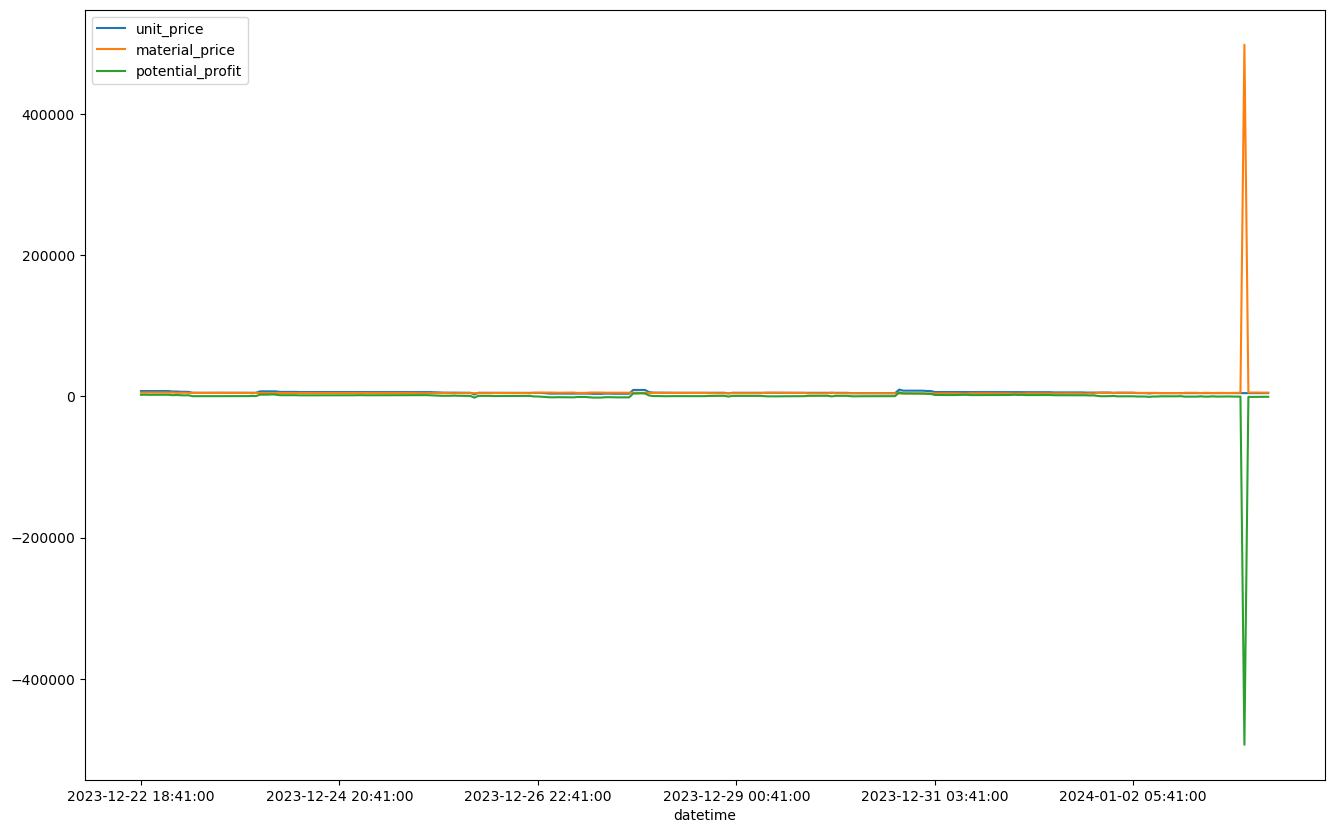

In [13]:
dreamtender_charm_df.plot(figsize=(16,10))

In [10]:
dreamtender_charm_df['potential_profit'].mean()

-996.4504912280704